# KMeans Clustering

This notebook demonstrates a KMeans algorithm tested on the SPAETH Clustering Dataset.

In [2]:
import sys
import numpy as np
import pandas as pd
from kmeans import KMeansModel, KMeansPlusPlusInitializer
from matplotlib.pyplot import *
import seaborn as sns
%matplotlib inline

/Users/jeremy/anaconda/lib/python3.4/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


## Load and transform data
Load the data into a Pandas DataFrame. The SPAETH files contain headers. Each line of which is preceeded with a `#`, so we'll filter out those lines.

In [3]:
def load_spaeth_data(filepath):
    lines = []
    with open(filepath) as f:
        for line in f:
            if '#' not in line:
                lines.append(line.split())
    return lines

lines = load_spaeth_data('../data/spaeth_03.txt')
df = pd.DataFrame(lines, columns=['x', 'y'], dtype=float)
df.head()

,x,y
0,38.0,50.0
1,40.0,50.0
2,44.0,50.0
3,46.0,50.0
4,49.0,50.0


## Build the model
The parameter `k` indicates how many clusters to group the data into

In [4]:
model = KMeansModel()
model.initializer = KMeansPlusPlusInitializer()
model.learn(df, ['x', 'y'], k=3)

## Visualize the results
Each cluster is represented in a unique color with a red circle representing the __centroid__.

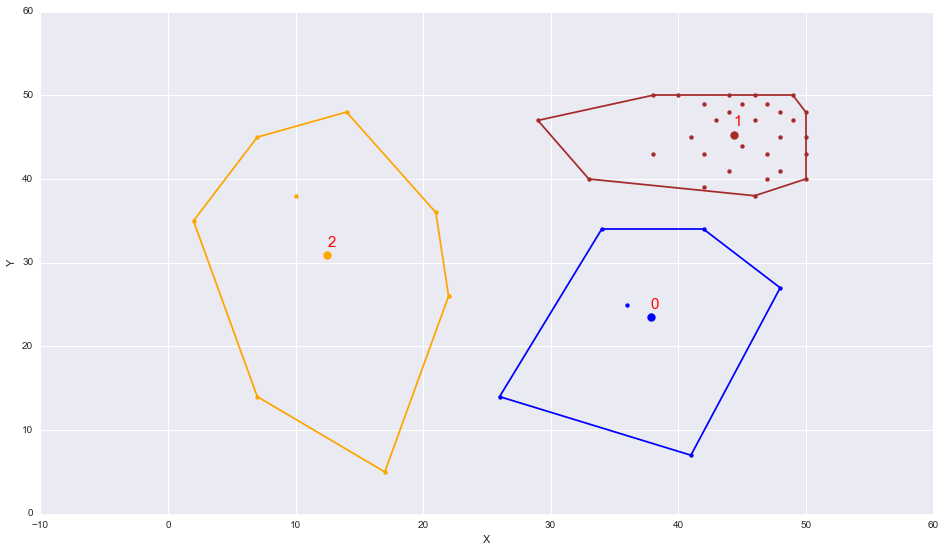

In [5]:
from collections import deque
from scipy.spatial import ConvexHull

colors = deque(['b', 'r', 'w', 'k', 'c', 'm', 'y', 'g', 'orange', 'brown'])
figure(figsize=(16, 9))
#add_subplot(1, 1, 1)
for k, cluster in model.clusters.items():
    # plot each point in each cluster in the scatter plot 
    x = [v[0] for v in cluster]
    y = [v[1] for v in cluster]
    scatter(x, y, color=colors[0], s=16)
    
    # can only draw a hull if there are three or more points
    if len(cluster) >= 3:
        # draw the convex hull of each cluster
        hull = ConvexHull(cluster)
        for simplex in hull.simplices:
            plot(np.array(cluster)[simplex, 0], np.array(cluster)[simplex, 1], 'k-', c=colors[0])
    
    # plot the means
    x = model.means[k][0]
    y = model.means[k][1]
    scatter(x, y, color=colors[0], s=64)
    text(x, y + 1, str(k), fontsize=15, color='r')
    colors.rotate()

ylabel('Y')
xlabel('X')

In [6]:
subset = df[8:12]
model.predict(subset, ['x', 'y'])

[2, 1, 1, 1]

## Visualize the quality metric of the model over iterations

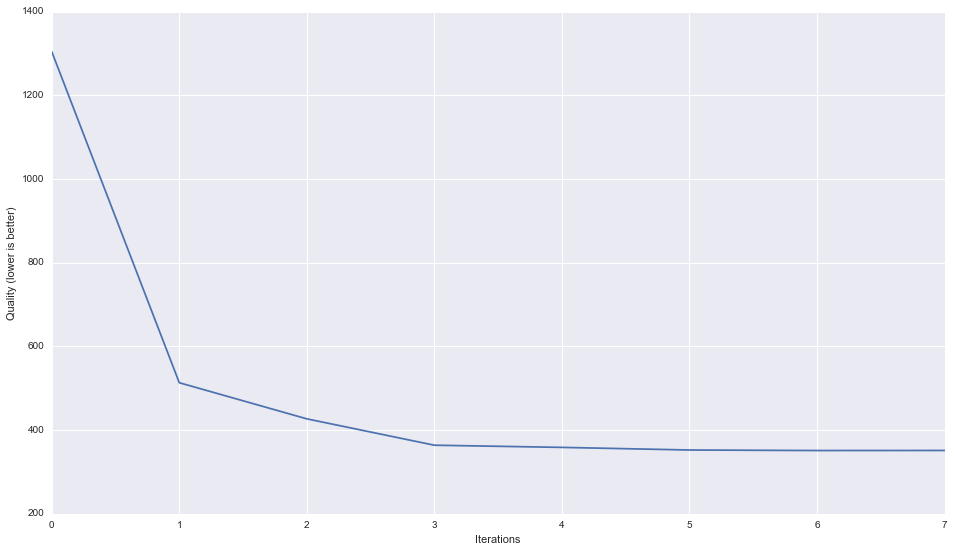

In [7]:
figure(figsize=(16, 9))
xlabel('Iterations')
ylabel('Quality (lower is better)')
plot(range(0, model.iterations), model.quality_metrics)